In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
from pyrosm import OSM
from pyrosm import get_data
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

%matplotlib inline

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shape

In [13]:
place = 'тверской, Москва'
local_crs = 32637

In [5]:
# Fetch OSM street network from the location
# G = ox.graph_from_place(place)
# Or load the G.osm if available on local disk
G = ox.io.load_graphml('./тверской_G.osm')

Using Pyrosm for reading OpenStreetMap from Protocolbuffer Binary Format -files (*.osm.pbf) into Geopandas GeoDataFrames. Pyrosm makes it easy to extract various datasets from OpenStreetMap pbf-dumps including e.g. road networks, buildings, Points of Interest (POI), landuse, natural elements, administrative boundaries and much more. Fully customized queries are supported which makes it possible to parse any kind of data from OSM, even with more specific filters.

In [29]:
# Pyrosm can be used straight away
# fp = get_data("тверской_G.osm")

# # Initialize the OSM parser object
# osm = OSM(fp)

# # Read all drivable roads
# # =======================
# drive_net = osm.get_network(network_type="driving")
# drive_net.plot()

In [5]:
# Saving the G.osm file into local disk
# ox.io.save_graphml(G, filepath='./G.osm')


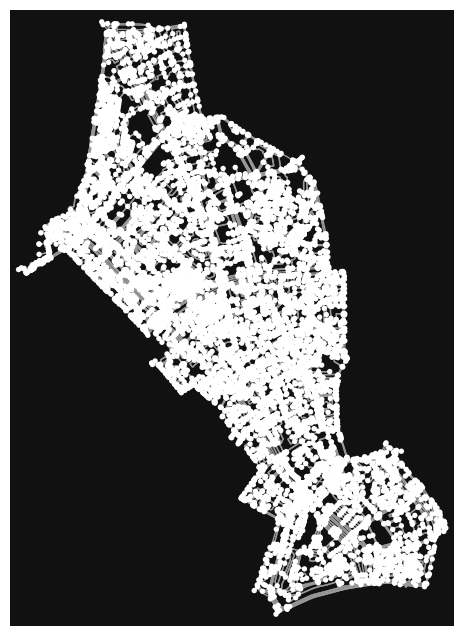

In [6]:
# Plot the streets
fig, ax = ox.plot_graph(G)

## Graph to GeoDataFrame

In [7]:
 # Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

In [8]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
35880127,55.769591,37.596747,4,NaN,NaN,POINT (37.59675 55.76959)
35881070,55.759535,37.624786,3,NaN,NaN,POINT (37.62479 55.75953)
35881795,55.760454,37.626688,4,NaN,NaN,POINT (37.62669 55.76045)
35881796,55.759523,37.627868,5,NaN,NaN,POINT (37.62787 55.75952)
35881998,55.756578,37.630075,5,NaN,NaN,POINT (37.63007 55.75658)


In [9]:
edges.head()

osmid lanes    highway  maxspeed  oneway  \
u        v          key                                                 
35880127 813653311  0    497681043     2    primary  RU:urban   False   
         57603520   0      9019216     4    primary  RU:urban    True   
35881070 5285841497 0     10619163     4  secondary  RU:urban    True   
         104215987  0    159669385     4    primary  RU:urban    True   
35881796 5285841418 0    542090313     2    service        60    True   

                        reversed  length                  name  \
u        v          key                                          
35880127 813653311  0      False   9.658                   NaN   
         57603520   0      False  86.457  Триумфальная площадь   
35881070 5285841497 0      False  31.916     Лубянская площадь   
         104215987  0      False  54.460     Лубянская площадь   
35881796 5285841418 0      False  24.965                   NaN   

                                                                  geometry  \
u        v          key                                                      
35880127 813653311  0    LINESTRING (37.59675 55.76959, 37.59686 55.76965)   
         57603520   0    LINESTRING (37.59675 55.76959, 37.59660 55.769...   
35881070 5285841497 0    LINESTRING (37.62479 55.75953, 37.62526 55.75965)   
         104215987  0    LINESTRING (37.62479 55.75953, 37.62524 55.759...   
35881796 5285841418 0    LINESTRING (37.62787 55.75952, 37.62771 55.75973)   

                        access service tunnel width bridge  
u        v          key                                     
35880127 813653311  0      NaN     NaN    NaN   NaN    NaN  
         57603520   0      NaN     NaN    NaN   NaN    NaN  
35881070 5285841497 0      NaN     NaN    NaN   NaN    NaN  
         104215987  0      NaN     NaN    NaN   NaN    NaN  
35881796 5285841418 0      NaN     NaN    NaN   NaN    NaN

In [10]:
edges.shape

(30064, 14)

In [11]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 30064 entries, (35880127, 813653311, 0) to (10733683237, 4523237380, 0)
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     30064 non-null  object  
 1   lanes     6384 non-null   object  
 2   highway   30064 non-null  object  
 3   maxspeed  2191 non-null   object  
 4   oneway    30064 non-null  bool    
 5   reversed  30064 non-null  object  
 6   length    30064 non-null  float64 
 7   name      3537 non-null   object  
 8   geometry  30064 non-null  geometry
 9   access    1573 non-null   object  
 10  service   1069 non-null   object  
 11  tunnel    1523 non-null   object  
 12  width     1648 non-null   object  
 13  bridge    53 non-null     object  
dtypes: bool(1), float64(1), geometry(1), object(11)
memory usage: 3.8+ MB


<Axes: >

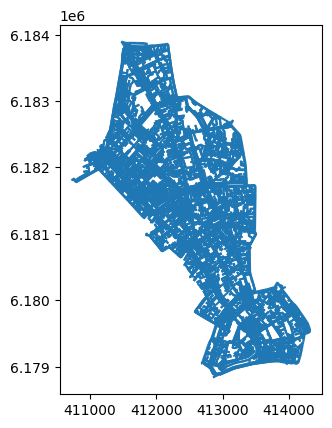

In [30]:
edges.plot()

<Axes: >

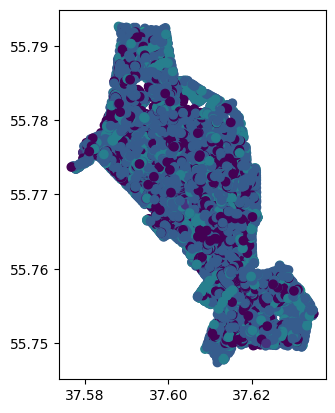

In [36]:
nodes.plot(column='street_count')

<Axes: >

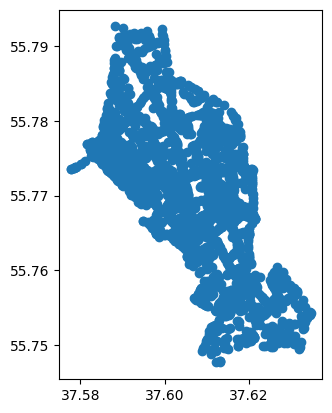

In [49]:
nodes.loc[nodes['street_count'] == 4].plot()

## Points-of-interest

In [14]:
area = ox.geocode_to_gdf(place) 
buildings = ox.geometries_from_place(place, tags={'building':True}) # Retrieve buildings from the area:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place, 
                                  tags={"amenity": "restaurant"}
                                 )
parks = ox.geometries_from_place(place, {
        "leisure": "park",
        "landuse": "grass",
    },) # fetch data

In [18]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(local_crs)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
restaurants = restaurants.to_crs(projection)
parks = parks.to_crs(projection) # re-project the park polygons and add them to our map:

In [19]:
тверской_area = area.area / 10**6
print(f'{place} area : {тверской_area} km2')

тверской, Москва area : 0    7.302966
dtype: float64 km2


In [20]:
buildings.head()

colour             operator  ref  \
element_type osmid                                         
node         1835557576    NaN                  NaN  NaN   
             1997933510    NaN                  NaN  NaN   
             2134689719    NaN  ООО «Комхоз-Сервис»  NaN   
             2591217665    NaN  ООО «Комхоз-Сервис»  NaN   
             2967468690    NaN  ООО «Комхоз-Сервис»  NaN   

                                               geometry note railway  \
element_type osmid                                                     
node         1835557576  POINT (411751.466 6183468.277)  NaN     NaN   
             1997933510  POINT (411951.890 6183074.643)  NaN     NaN   
             2134689719  POINT (413483.971 6181530.079)  NaN     NaN   
             2591217665  POINT (414193.811 6179773.163)  NaN     NaN   
             2967468690  POINT (412379.822 6180941.039)  NaN     NaN   

                        wheelchair historic              name fixme  ...  \
element_type osmid                                                   ...   
node         1835557576        NaN      NaN               NaN   NaN  ...   
             1997933510        NaN      NaN               NaN   NaN  ...   
             2134689719        NaN      NaN  Городской туалет   NaN  ...   
             2591217665        NaN      NaN  Городской туалет   NaN  ...   
             2967468690        NaN      NaN  Городской туалет   NaN  ...   

                        name:ja name:nl name:nn name:ka name:hy stairs  \
element_type osmid                                                       
node         1835557576     NaN     NaN     NaN     NaN     NaN    NaN   
             1997933510     NaN     NaN     NaN     NaN     NaN    NaN   
             2134689719     NaN     NaN     NaN     NaN     NaN    NaN   
             2591217665     NaN     NaN     NaN     NaN     NaN    NaN   
             2967468690     NaN     NaN     NaN     NaN     NaN    NaN   

                        building:levels:underground building:parts  \
element_type osmid                                                   
node         1835557576                         NaN            NaN   
             1997933510                         NaN            NaN   
             2134689719                         NaN            NaN   
             2591217665                         NaN            NaN   
             2967468690                         NaN            NaN   

                        construction:tourism craft  
element_type osmid                                  
node         1835557576                  NaN   NaN  
             1997933510                  NaN   NaN  
             2134689719                  NaN   NaN  
             2591217665                  NaN   NaN  
             2967468690                  NaN   NaN  

[5 rows x 254 columns]

In [21]:
# Available columns
buildings.columns

Index(['colour', 'operator', 'ref', 'geometry', 'note', 'railway',
       'wheelchair', 'historic', 'name', 'fixme',
       ...
       'name:ja', 'name:nl', 'name:nn', 'name:ka', 'name:hy', 'stairs',
       'building:levels:underground', 'building:parts', 'construction:tourism',
       'craft'],
      dtype='object', length=254)

In [22]:
restaurants.head()

amenity  \
element_type osmid                   
node         614945569  restaurant   
             623350670  restaurant   
             623350682  restaurant   
             813653264  restaurant   
             813972248  restaurant   

                                                    contact:instagram  \
element_type osmid                                                      
node         614945569  https://www.instagram.com/elidilio.restaurant   
             623350670                                            NaN   
             623350682                                            NaN   
             813653264                                            NaN   
             813972248                                            NaN   

                                        contact:phone  \
element_type osmid                                      
node         614945569                 +7 495 6504804   
             623350670                 +7 495 7390011   
             623350682                 +7 495 6518181   
             813653264  +7 495 6940056;+7 499 3507744   
             813972248                 +7 495 6940930   

                                contact:website    cuisine  \
element_type osmid                                           
node         614945569     https://elidilio.ru/    spanish   
             623350670   www.Turandot-Palace.ru        NaN   
             623350682  http://www.castadiva.ru        NaN   
             813653264   https://tarasbulba.ru/  ukrainian   
             813972248   http://www.la-maree.ru    seafood   

                                       name  \
element_type osmid                            
node         614945569            El Idilio   
             623350670             Турандот   
             623350682           Каста Дива   
             813653264  Корчма Тарас Бульба   
             813972248              Ла Маре   

                                                  opening_hours  \
element_type osmid                                                
node         614945569                        Mo-Su 12:00-23:00   
             623350670                                      NaN   
             623350682                                      NaN   
             813653264  Fr-Sa 09:00-02:00; Mo-Th,Su 09:00-24:00   
             813972248                                      NaN   

                                              geometry addr:housenumber  \
element_type osmid                                                        
node         614945569  POINT (412045.086 6181108.331)              NaN   
             623350670  POINT (412424.072 6180589.971)             26/5   
             623350682  POINT (412428.747 6180563.748)               26   
             813653264  POINT (413276.810 6181817.219)         13/14 с2   
             813972248  POINT (413040.764 6181114.772)              NaN   

                       addr:postcode  ... nodes building building:colour  \
element_type osmid                    ...                                  
node         614945569           NaN  ...   NaN      NaN             NaN   
             623350670        125009  ...   NaN      NaN             NaN   
             623350682        125009  ...   NaN      NaN             NaN   
             813653264           NaN  ...   NaN      NaN             NaN   
             813972248           NaN  ...   NaN      NaN             NaN   

                       building:levels name:fa roof:colour roof:material  \
element_type osmid                                                         
node         614945569             NaN     NaN         NaN           NaN   
             623350670             NaN     NaN         NaN           NaN   
             623350682             NaN     NaN         NaN           NaN   
             813653264             NaN     NaN         NaN           NaN   
             813972248             NaN     NaN         NaN           NaN   

                     

In [23]:
# Available columns
restaurants.columns.values 

array(['amenity', 'contact:instagram', 'contact:phone', 'contact:website',
       'cuisine', 'name', 'opening_hours', 'geometry', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'contact:email', 'name:en',
       'operator', 'email', 'internet_access', 'internet_access:fee',
       'name:ru', 'toilets:wheelchair', 'wheelchair', 'official_name',
       'website', 'brand', 'brand:wikidata', 'contact:facebook',
       'contact:vk', 'diet:vegetarian', 'name:de', 'phone', 'delivery',
       'addr:city', 'old_name', 'addr:country', 'check_date', 'karaoke',
       'level', 'reservation', 'diet:raw', 'diet:vegan', 'alt_name',
       'int_name', 'name:it', 'smoking', 'award:michelin',
       'check_date:opening_hours', 'shop', 'wikidata', 'wikipedia',
       'outdoor_seating', 'name:es', 'diet:pescetarian', 'highchair',
       'indoor', 'addr:floor', 'brand:wikipedia', 'air_conditioning',
       'indoor_seating', 'breakfast', 'description',
       'opening_hours:covid19', 'name:ja', 

In [24]:
# Select some useful cols and print
interesting_columns = [
    "name",
    "name:en",
    "opening_hours",
    "addr:city",
    "addr:country",
    "addr:housenumber",
    "addr:postcode",
    "addr:street"
]

# Print only selected cols
restaurants[interesting_columns].head() 

name     name:en  \
element_type osmid                                        
node         614945569            El Idilio         NaN   
             623350670             Турандот    Turandot   
             623350682           Каста Дива  Casta Diva   
             813653264  Корчма Тарас Бульба         NaN   
             813972248              Ла Маре    La Marée   

                                                  opening_hours addr:city  \
element_type osmid                                                          
node         614945569                        Mo-Su 12:00-23:00       NaN   
             623350670                                      NaN       NaN   
             623350682                                      NaN       NaN   
             813653264  Fr-Sa 09:00-02:00; Mo-Th,Su 09:00-24:00       NaN   
             813972248                                      NaN       NaN   

                       addr:country addr:housenumber addr:postcode  \
element_type osmid                                                   
node         614945569          NaN              NaN           NaN   
             623350670          NaN             26/5        125009   
             623350682          NaN               26        125009   
             813653264          NaN         13/14 с2           NaN   
             813972248          NaN              NaN           NaN   

                                     addr:street  
element_type osmid                                
node         614945569                       NaN  
             623350670          Тверской бульвар  
             623350682          Тверской бульвар  
             813653264  Садовая-Самотёчная улица  
             813972248                       NaN

In [27]:
parks.head() # check all values for the column

barrier  \
element_type osmid              
way          23378656    kerb   
             25298240     NaN   
             36419095     NaN   
             56160055     NaN   
             84632771     NaN   

                                                                geometry kerb  \
element_type osmid                                                              
way          23378656  POLYGON ((413007.119 6181136.152, 413007.341 6...  NaN   
             25298240  POLYGON ((413898.265 6180078.568, 413900.007 6...  NaN   
             36419095  POLYGON ((412720.926 6182485.761, 412728.814 6...  NaN   
             56160055  POLYGON ((411310.872 6182383.360, 411325.952 6...  NaN   
             84632771  POLYGON ((413628.387 6179663.189, 413630.295 6...  NaN   

                                     name name:en             name:ru  dog  \
element_type osmid                                                           
way          23378656  Нарышкинский сквер     NaN                 NaN  NaN   
             25298240                 NaN     NaN                 NaN  NaN   
             36419095  Антроповский сквер     NaN  Антроповский сквер  NaN   
             56160055                 NaN     NaN                 NaN  NaN   
             84632771                 NaN     NaN                 NaN  NaN   

                                                                   nodes  \
element_type osmid                                                         
way          23378656  [253123974, 2713945920, 2713945935, 5403485484...   
             25298240  [983511087, 983601422, 983510524, 983601758, 9...   
             36419095  [424674038, 424674041, 424674044, 7847670167, ...   
             56160055  [1145906184, 1145905646, 3059927790, 960906103...   
             84632771  [983160458, 983162629, 983181700, 3216333757, ...   

                      leisure landuse  ... name:ml name:sv name:vi name:zh  \
element_type osmid                     ...                                   
way          23378656    park     NaN  ...     NaN     NaN     NaN     NaN   
             25298240     NaN   grass  ...     NaN     NaN     NaN     NaN   
             36419095    park     NaN  ...     NaN     NaN     NaN     NaN   
             56160055    park     NaN  ...     NaN     NaN     NaN     NaN   
             84632771     NaN   grass  ...     NaN     NaN     NaN     NaN   

                      name:be old_name contact:phone contact:website  \
element_type osmid                                                     
way          23378656     NaN      NaN           NaN             NaN   
             25298240     NaN      NaN           NaN             NaN   
             36419095     NaN      NaN           NaN             NaN   
             56160055     NaN      NaN           NaN             NaN   
             84632771     NaN      NaN           NaN             NaN   

                      description name:eo  
element_type osmid                         
way          23378656         NaN     NaN  
             25298240         NaN     NaN  
             36419095         NaN     NaN  
             56160055         NaN     NaN  
             84632771         NaN     NaN  

[5 rows x 31 columns]

In [33]:
# parks = leisure[leisure["leisure"].isin(["pitch","park","playground", "outdoor_seating", "dog_park"])] # select all park polygons

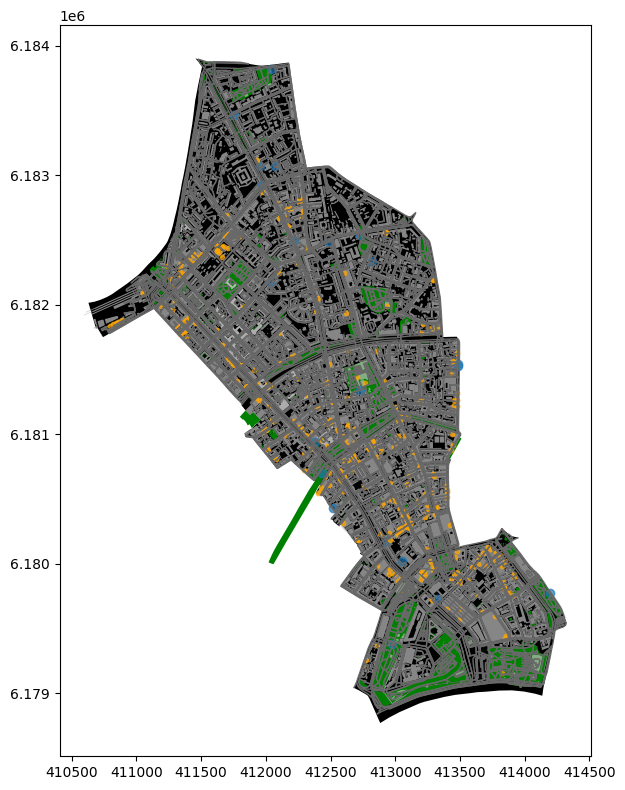

In [28]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='orange', alpha=0.7, markersize=10)
plt.tight_layout()

### Beautiful Maps : https://github.com/CarlosLannister/beautifulMaps/blob/main/createMapRoads.py

#### Create Map Road

In [2]:
import osmnx as ox
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

# Define city/cities

# Get data for places

G = ox.io.load_graphml('тверской_G.osm')
'''
places = ["Moscow, Russia"]
G = ox.graph_from_place(places,  retain_all=True, simplify = True, network_type='all')
'''

'''
point = (55.747981, 37.616865)
G = ox.graph_from_point(point, dist=10000, retain_all=True, simplify = True, network_type='all')
'''

u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    



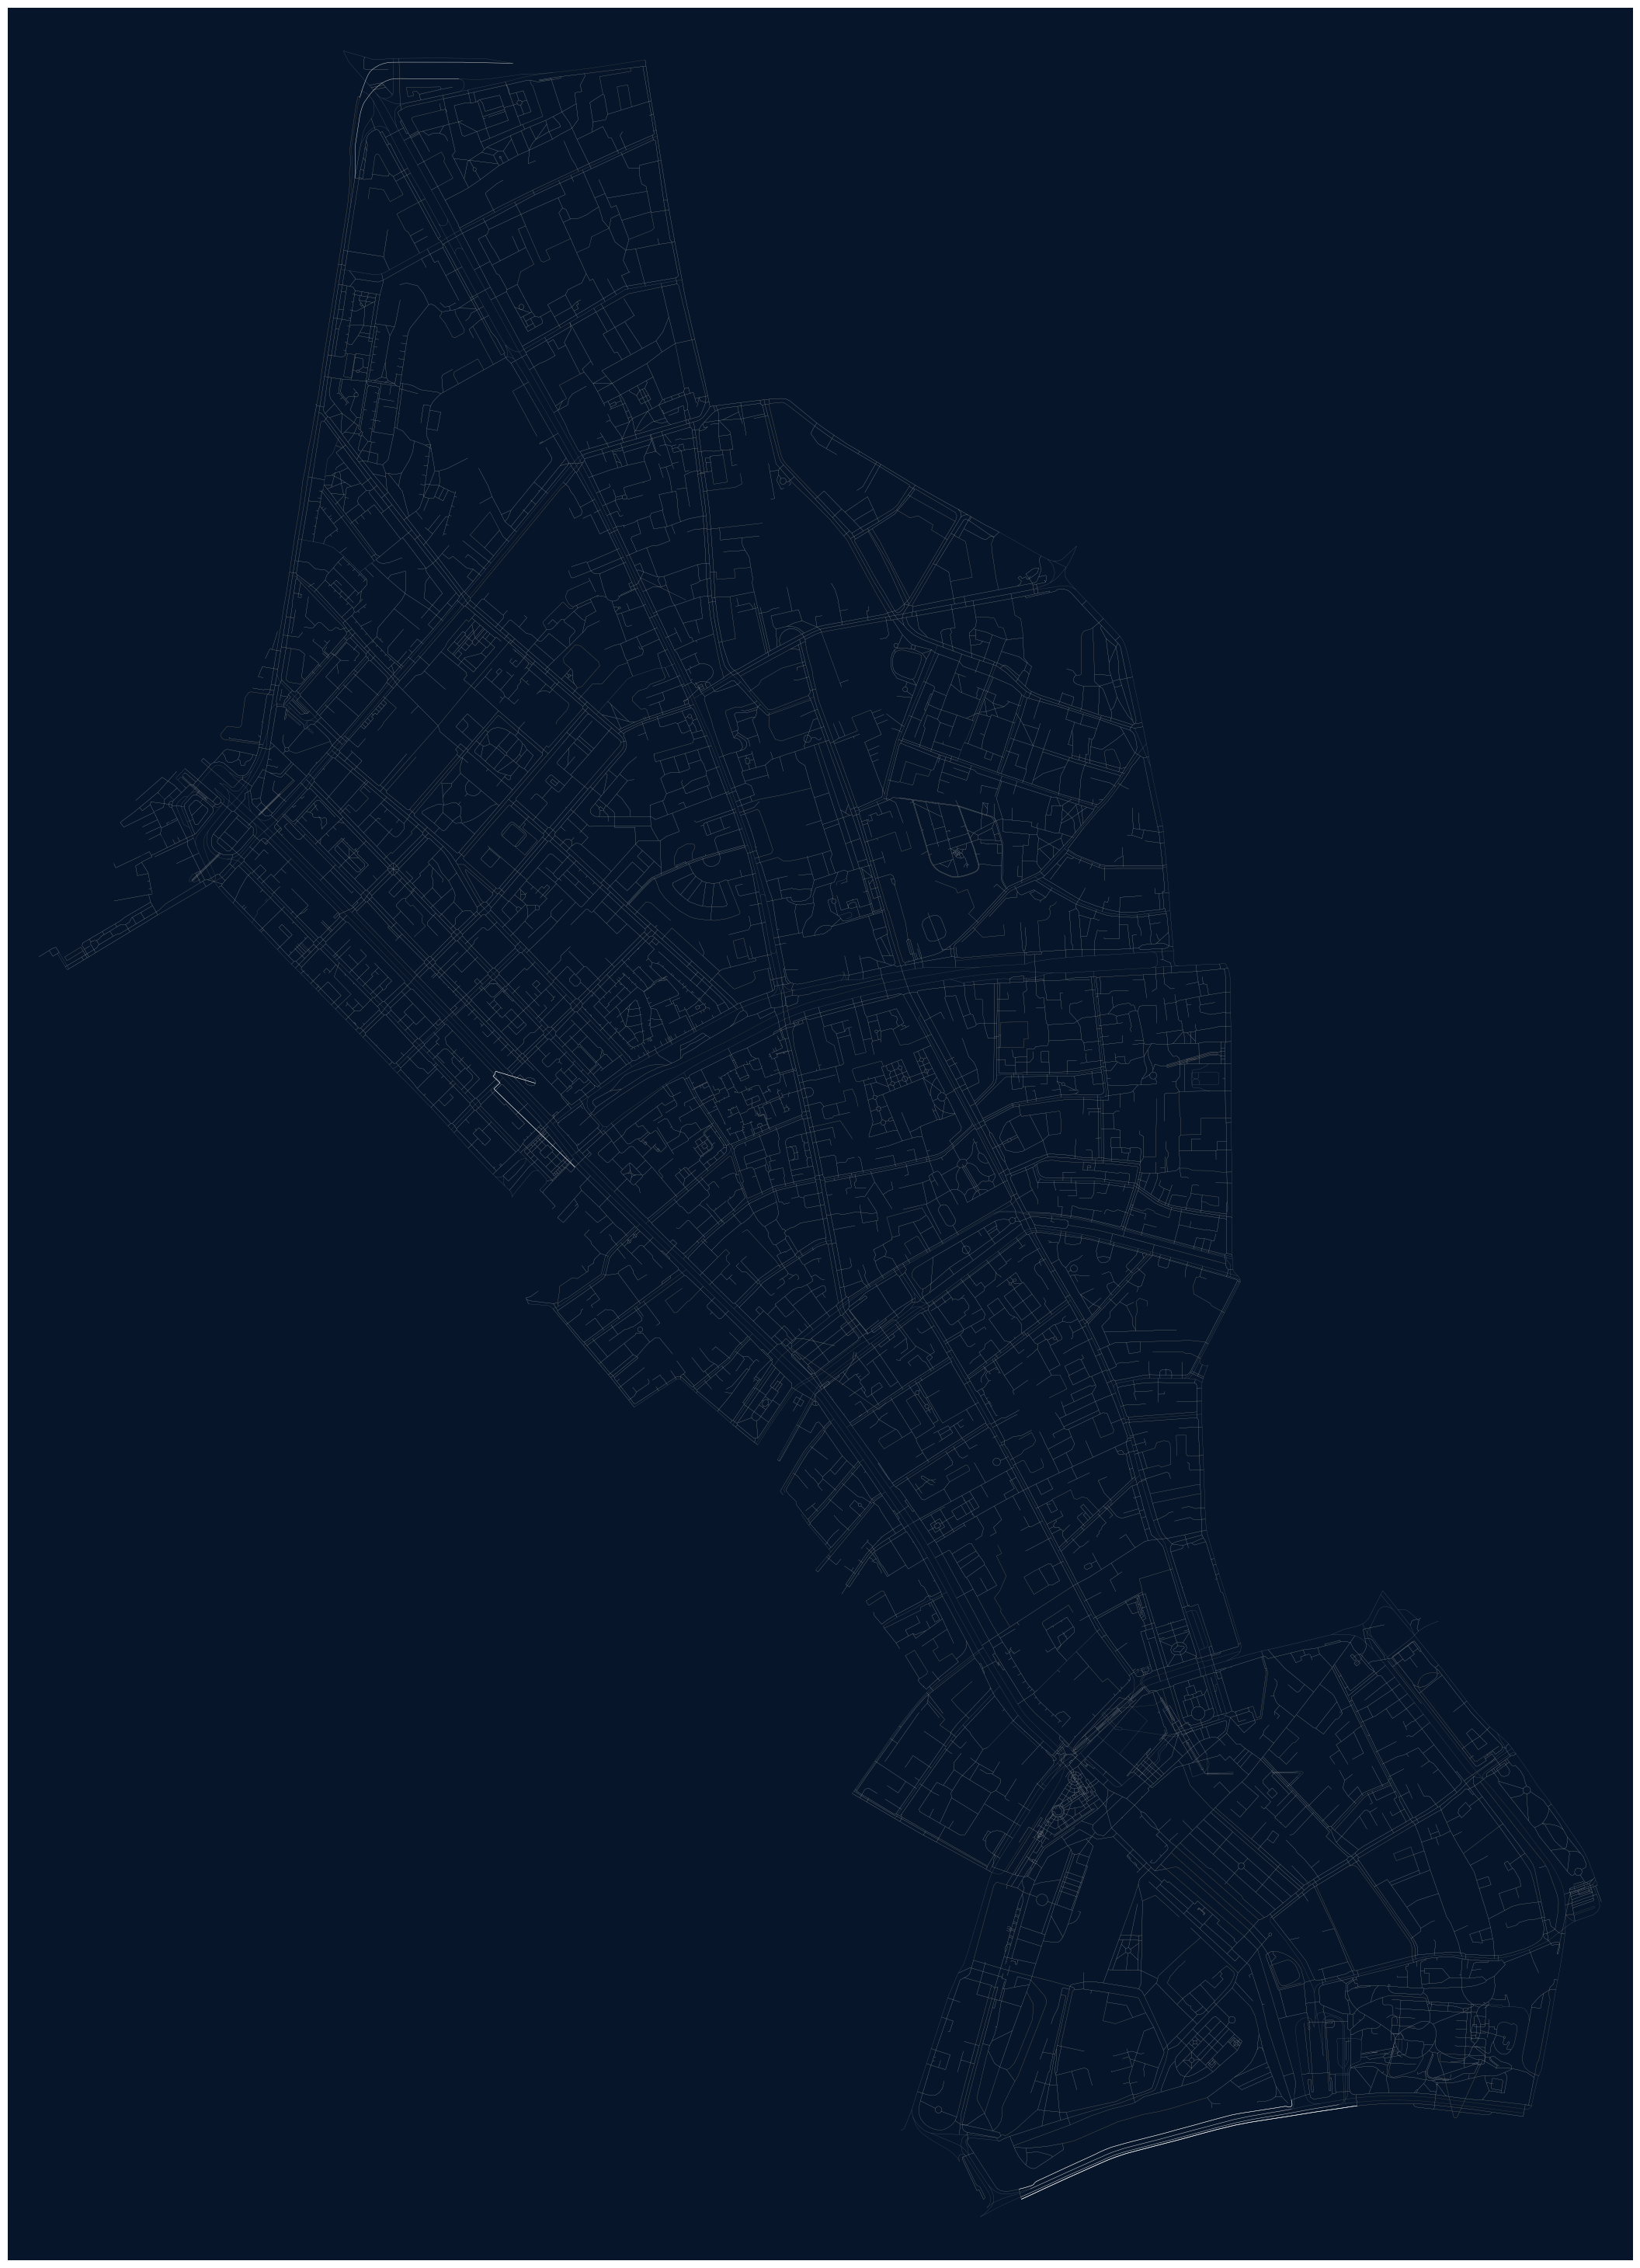

In [2]:
# List to store colors
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#d5d5d5"
            linewidth = 0.35
        else:
            color = "#ededed"
            linewidth = 0.45
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)
            

# Center of map
latitude = 55.747981
longitude = 37.616865



bgcolor = "#061529"

fig, ax = ox.plot_graph(G, node_size=0,figsize=(27, 40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

'''
# Bbox sides
north = latitude + 0.15
south = latitude - 0.15
east = longitude + 0.15
west = longitude - 0.15
fig, ax = ox.plot_graph(G, node_size=0, bbox = (north, south, east, west),
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)
'''

fig.tight_layout(pad=0)
fig.savefig("roadMap.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=False)

In [ ]:
# ox.io.save_graphml(G, filepath='./G.osm')

### Create Water Map : https://github.com/Lisa-Ho/30-day-map-challenge/blob/main/2022/Day2/Amsterdam_highways.ipynb

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from matplotlib import font_manager

### Get Data

In [8]:
place = "Moscow, Russia"

### Water

In [9]:
 water_tags = {'water': True,
            'natural': ['water', 'bay', 'spring', 'strait', 'wetland'],
            'place': ['sea', 'ocean'],
            'waterway': [
             'river', 'riverbank', 'stream', 'tidal_channel', 'canal', 
            'drain', 'ditch', 'fairway']}

In [10]:
water = ox.geometries_from_place(place, tags=water_tags)

### Roads

In [11]:
roads = ox.graph_from_place(place, network_type='drive')

In [12]:
# Prepare roads data
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in roads.edges(keys=True, data=True): # added ww
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)

### Cycle Ways

In [13]:
def get_cycleways_place(city_name): 
    
    # Configuring osmnx
    useful_tags = ox.settings.useful_tags_way + ['cycleway']
    ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
    
    # Querying for roads and bike trails
    cycleways = ox.graph_from_place(city_name, network_type='bike', simplify=False)
    
    # Finding all non-cycleways in the network
    non_cycleways = [(u, v, k) for  u, v, k, d  in  cycleways.edges(keys=True, data=True) if  not ('cycleway'  in  d  or  d['highway']=='cycleway')]
   
    # Remove non-cycleways and isolated nodes
    cycleways.remove_edges_from(non_cycleways)
    cycleways = ox.utils_graph.remove_isolated_nodes(cycleways)
    
    return cycleways

In [ ]:
cycleways = get_cycleways_place(place)

/srv/conda/envs/notebook/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


### Roads Network

In [1]:
#define colours and width by road type
roadwidth = []
roadcols = []
for item in data:    
    if "highway" in item.keys():
        if item["highway"] == "primary":
            width = 2
            color = "white"
        if item["highway"] == "secondary" or item["highway"] == "tertiary":
            width = 1  
            color = "#ABABAB"
        else:
            width =  0.2
            color = "#888888"
    else:
        width = 0.2
        color = "#888888"
    roadwidth.append(width)
    roadcols.append(color)

NameError: name 'data' is not defined

In [ ]:
#Plot roads network
fig, ax = plt.subplots(figsize=(12,7), layout="tight")
fig.set_facecolor("#111111")
ax.set_facecolor("#111111")

#set boundaries
north = 52.46505852042678
south = 52.300299196161
east =  4.707088833945644
west = 5.070963865936067

#plot roads and water
ox.plot_graph(roads, ax=ax, node_size=0, edge_color=roadcols, edge_linewidth=roadwidth, bbox = (north, south,west,east),
              show=False, close=False)
ox.plot_footprints(water, ax=ax, color='#6da5b7',alpha=1, bbox = (north, south, west,east),
            show=False, close=False)
#6da5b7
#59788f
#3e7c94
#title and footer
plt.figtext(0.18,0.89,'Moscow', fontsize = 50, color='white', fontproperties=title_font)
plt.figtext(0.13,0.025,'Data: OSM | Design: Lisa Hornung', fontsize = 9, color='#ABABAB',fontproperties=label_font)

#save
plt.savefig("Moscow-road-network.png", dpi=300, bbox_inches="tight", pad_inches=0.1)

plt.show()